Results:
- What features/columns had a relatively even or normal distribution? Which features/columns did not?
    - The columns that had a relatively normal distribution were: gender, smoker, heart attack, age, height, weight, cholesterol, exercise, and systolic BP. 
    - The columns that did not have an even distribution were: name, glucose, and diastolic BP.
- How did you handle missing values? Why did you do this method as opposed to others?
    - There were no missing values.
- How did you encode your categorical data? Why did you do this method as opposed to others?
    - I decided to label encode the gender, smoker, and heart attack columns. I used label encoding because these columns had 1 of 2 possibilities, yes or no. The heart attack column was already encoded as 0's and 1's, but I went ahead and label encoded again becasue that is what I would have done. 
    - I used onehot encoding for the names. Since each has a unique value, it made since to onehot becasue there is no specific order. 
- How did you handle removing outliers? Why did you use this method as opposed to others?
    - I decided to use the IQR method. I decided on the IQR method because it works for any distribution. I do not have good knowledge about this field, so I decided on the IQR method because it is good to use if one does not have the best knowledge in the domain.
- How did you normalize/standardize the data? Why did you use this method as opposed to others?
    - I chose to standardize the data because this is the preferred method referring backing to class. 
- How did each model perform? Which performed the best?
    - Linear Regression Training Set: r2 score of .99, mean absolut error of .02, root mean squared error of .08 
    - Linear Regression Test Set: r2 score of -1.76, mean absolut error of 8849067575.95, root mean squared error of 41213471766.53
    - SVR Training Set: r2 score of .99, mean absolut error of .07, root mean squared error of .09
    - SVR Test Set: r2 score of .978, mean absolut error of .079, root mean squared error of .15
    - Decision tree Training Set: r2 score of 1.0, mean absolut error of 4.489e-16, root mean squared error of 4.73e-16
    - Decision Tree Test Set: r2 score of .979, mean absolut error of .009, root mean squared error of .14
    - Neural Network Training Set: r2 score of .998, mean absolut error of .018, root mean squared error of .045
    - Neural Netwrok Test Set: r2 score of .969, mean absolut error of .058, root mean squared error of .173
    - The decision tree model performed th ebest for me, with a r2 score of .979, though all my models besdies linear regression performed quite well on the testing set. The lowest r2 I got came from my neural network, which had a r2 score of .969.
- Did any models seem to have a relatively high amount of bias (underfitting)? Variance (overfitting)?
    - There were no models that seemed to have high amount of bias (underfitting) as all my models performed very well on the training set. However my linear regression seemed to have a high amount of variance (overfitting). It performed very poorly on the testing set compared to the training set. On my training set I had a r2 score of .99, almost perfect. When I performed it on the testing set I got a r2 score of -1.76, way below. The negative means one would have a better shot guessing. All my other models performed about the same between the training set adn testing set, with the highest difference being .021 when it came to the r2 scores of my decision tree model.

In [128]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
# load the data
rawDF = pd.read_csv("Heart_health.csv")

rawDF.head()

,ID,Name,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack
0,1,John Doe,45,Male,175,80,120/80,200,90,No,3,0
1,2,Jane Smith,35,Female,160,65,110/70,180,80,No,2,0
2,3,Michael Johnson,55,Male,180,85,130/85,220,95,Yes,4,1
3,4,Sarah Brown,40,Female,165,70,115/75,190,85,No,3,0
4,5,David Lee,50,Male,170,75,125/80,210,92,Yes,2,1


In [131]:
# Describe the data
rawDF.describe()

,ID,Age,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Exercise(hours/week),Heart Attack
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,361.712707,44.842541,171.161602,75.610497,206.022099,92.179558,2.770718,0.599448
std,207.901609,8.162429,6.242018,6.368595,11.224704,4.662712,0.934907,0.490349
min,1.000000,30.000000,155.000000,60.000000,170.000000,75.000000,1.000000,0.000000
25%,181.750000,38.000000,166.000000,71.000000,195.000000,88.000000,2.000000,0.000000
50%,362.500000,44.000000,170.000000,75.000000,210.000000,92.000000,3.000000,1.000000
75%,543.250000,53.000000,177.000000,81.000000,215.000000,96.000000,4.000000,1.000000
max,714.000000,60.000000,183.000000,89.000000,230.000000,100.000000,4.000000,1.000000


In [132]:
# Number of Na values in each column
rawDF.isna().sum()

ID                      0
Name                    0
Age                     0
Gender                  0
Height(cm)              0
Weight(kg)              0
Blood Pressure(mmHg)    0
Cholesterol(mg/dL)      0
Glucose(mg/dL)          0
Smoker                  0
Exercise(hours/week)    0
Heart Attack            0
dtype: int64

In [172]:
# Splitting Blood Pressure Column into a systolic and a diastolic column, because blood pressure was a string.
rawDF[['Systolic(mm)', 'Diastolic(Hg)']] = rawDF['Blood Pressure(mmHg)'].str.split('/', expand=True).astype(float)
rawDF.drop(columns=['Blood Pressure(mmHg)']) # I used ChatGPT for this part of code to help create the two new columns

,ID,Name,Age,Gender,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack,Systolic(mm),Diastolic(Hg)
0,1,John Doe,45,Male,175,80,200,90,No,3,0,120.0,80.0
1,2,Jane Smith,35,Female,160,65,180,80,No,2,0,110.0,70.0
2,3,Michael Johnson,55,Male,180,85,220,95,Yes,4,1,130.0,85.0
3,4,Sarah Brown,40,Female,165,70,190,85,No,3,0,115.0,75.0
4,5,David Lee,50,Male,170,75,210,92,Yes,2,1,125.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,710,Ashley Martinez,39,Female,166,68,195,88,No,3,0,118.0,76.0
720,711,James Rodriguez,56,Male,179,83,220,100,No,2,1,123.0,80.0
721,712,Mary Taylor,43,Female,167,70,200,92,No,2,0,120.0,78.0
722,713,Christopher Smith,53,Male,182,86,225,98,Yes,2,1,125.0,78.0


In [134]:
#Dropping id column and blood pressrue column because I created  systolic and diastolic columns
imputedDF= rawDF.drop(columns=['Blood Pressure(mmHg)', 'ID'])
imputedDF.head()

,Name,Age,Gender,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack,Systolic(mm),Diastolic(Hg)
0,John Doe,45,Male,175,80,200,90,No,3,0,120.0,80.0
1,Jane Smith,35,Female,160,65,180,80,No,2,0,110.0,70.0
2,Michael Johnson,55,Male,180,85,220,95,Yes,4,1,130.0,85.0
3,Sarah Brown,40,Female,165,70,190,85,No,3,0,115.0,75.0
4,David Lee,50,Male,170,75,210,92,Yes,2,1,125.0,80.0


In [135]:
# lists of column names
categoricalColumns = ["Name", "Gender", "Smoker", "Heart Attack"]
numericalColumns = ["Age", "Height(cm)", "Weight(kg)", "Cholesterol(mg/dL)", "Glucose(mg/dL)", "Exercise(hours/week)", "Systolic(mm)", "Diastolic(Hg)"]

In [136]:
# Making bar charts for all categorical columns
def makeBarCount(myDF, colName, width, height):
    plt.figure()
    myDF[colName].value_counts().plot(kind='bar', figsize=(width, height))
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title(f"Count of Entries In {colName} Column", y=1.02)
   

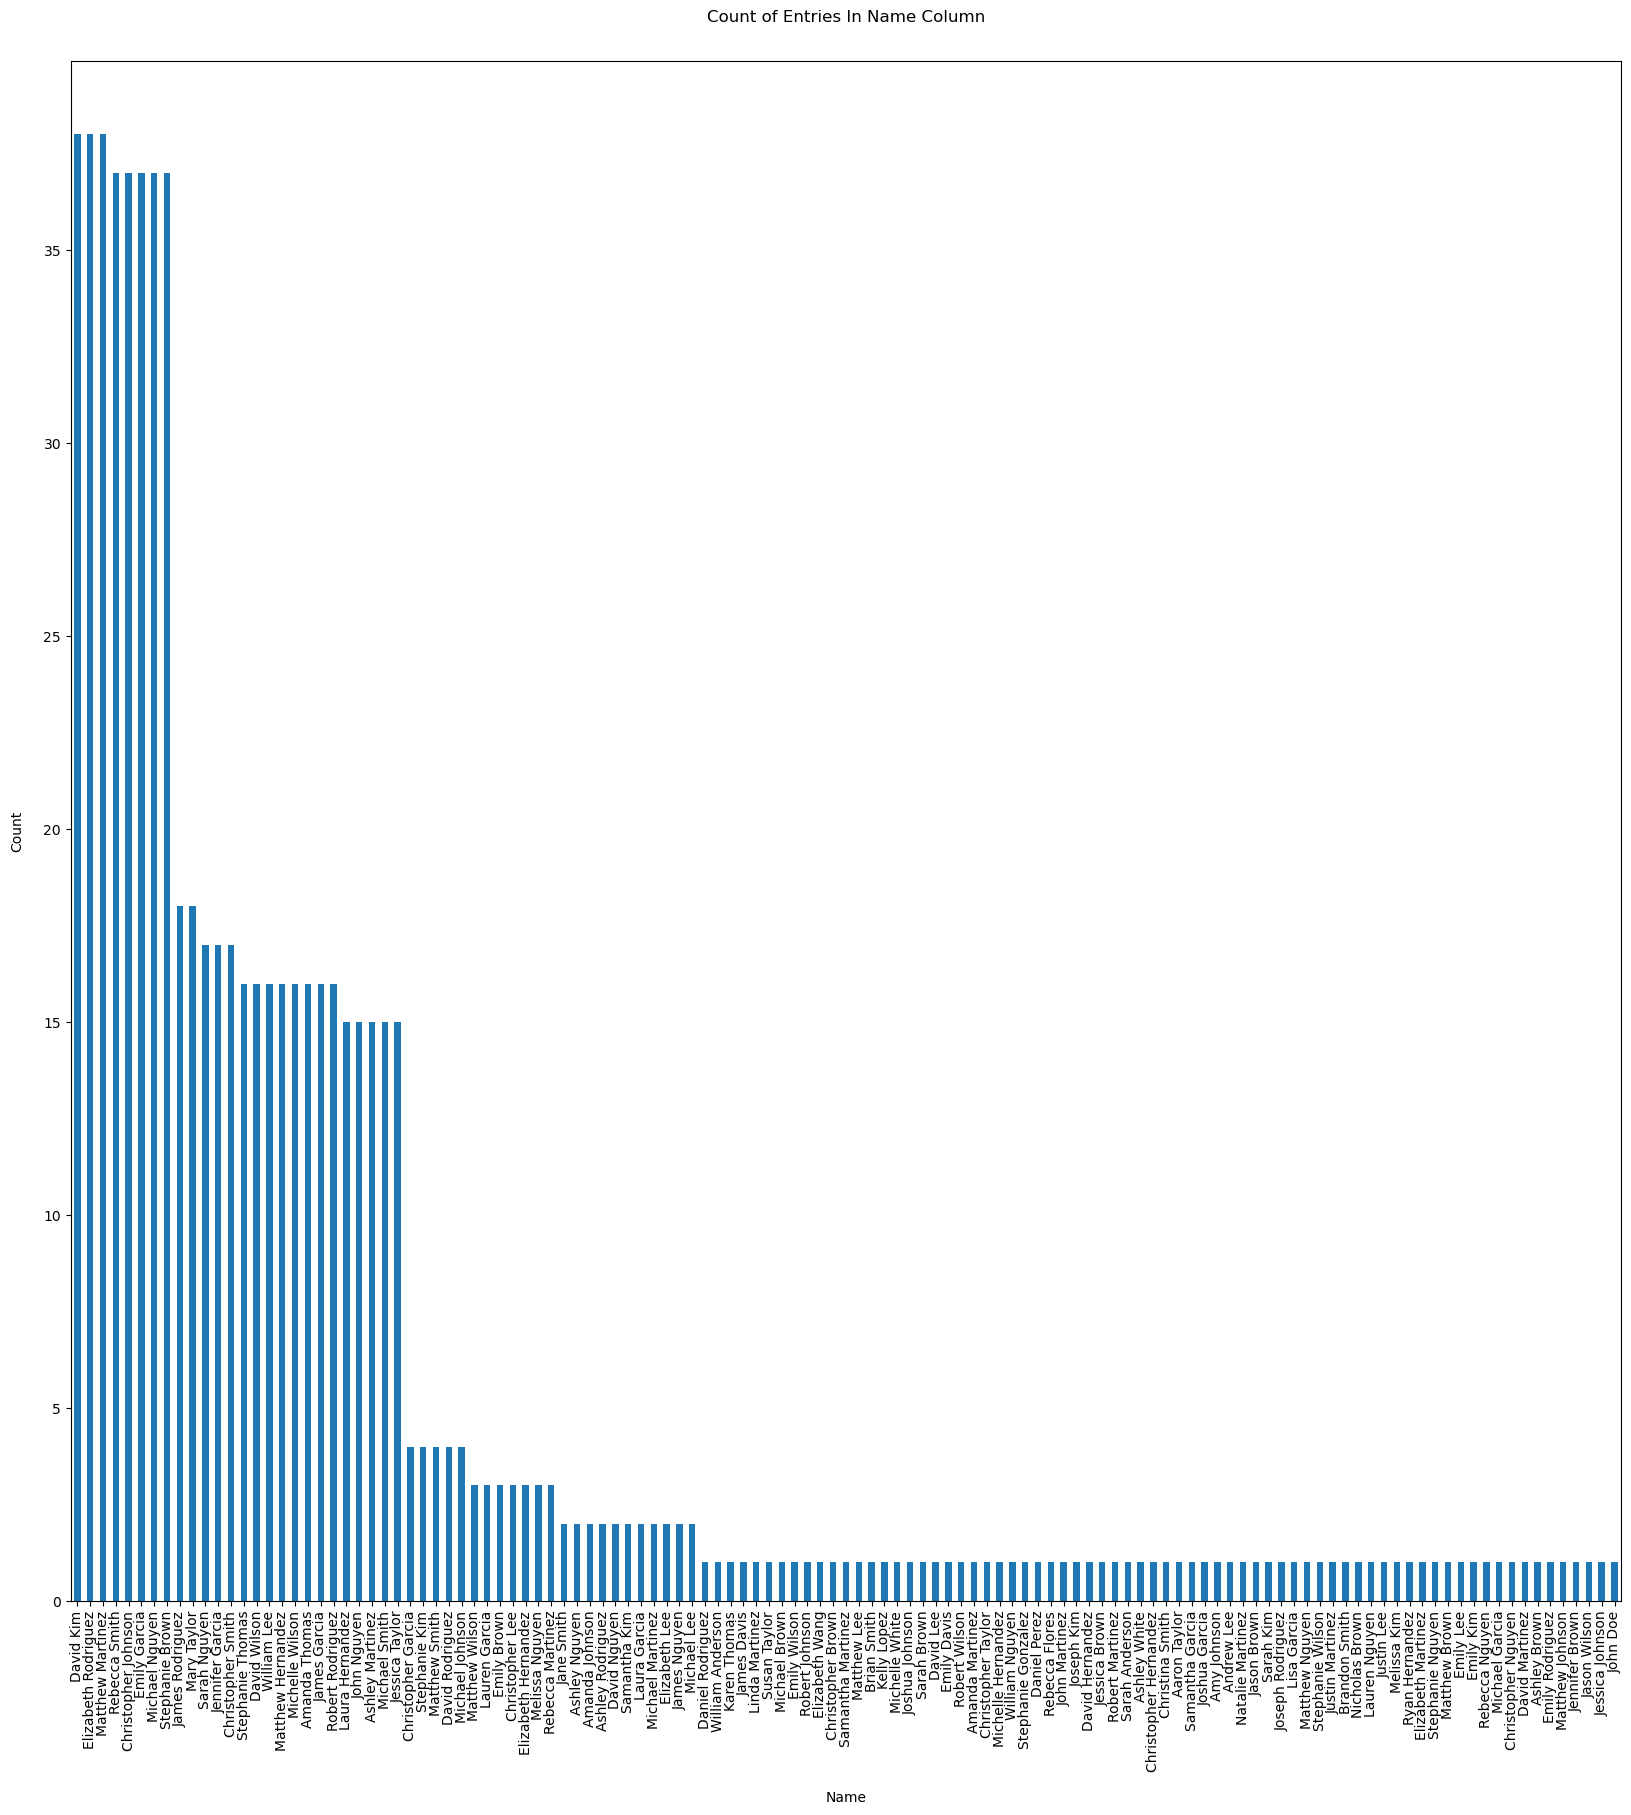

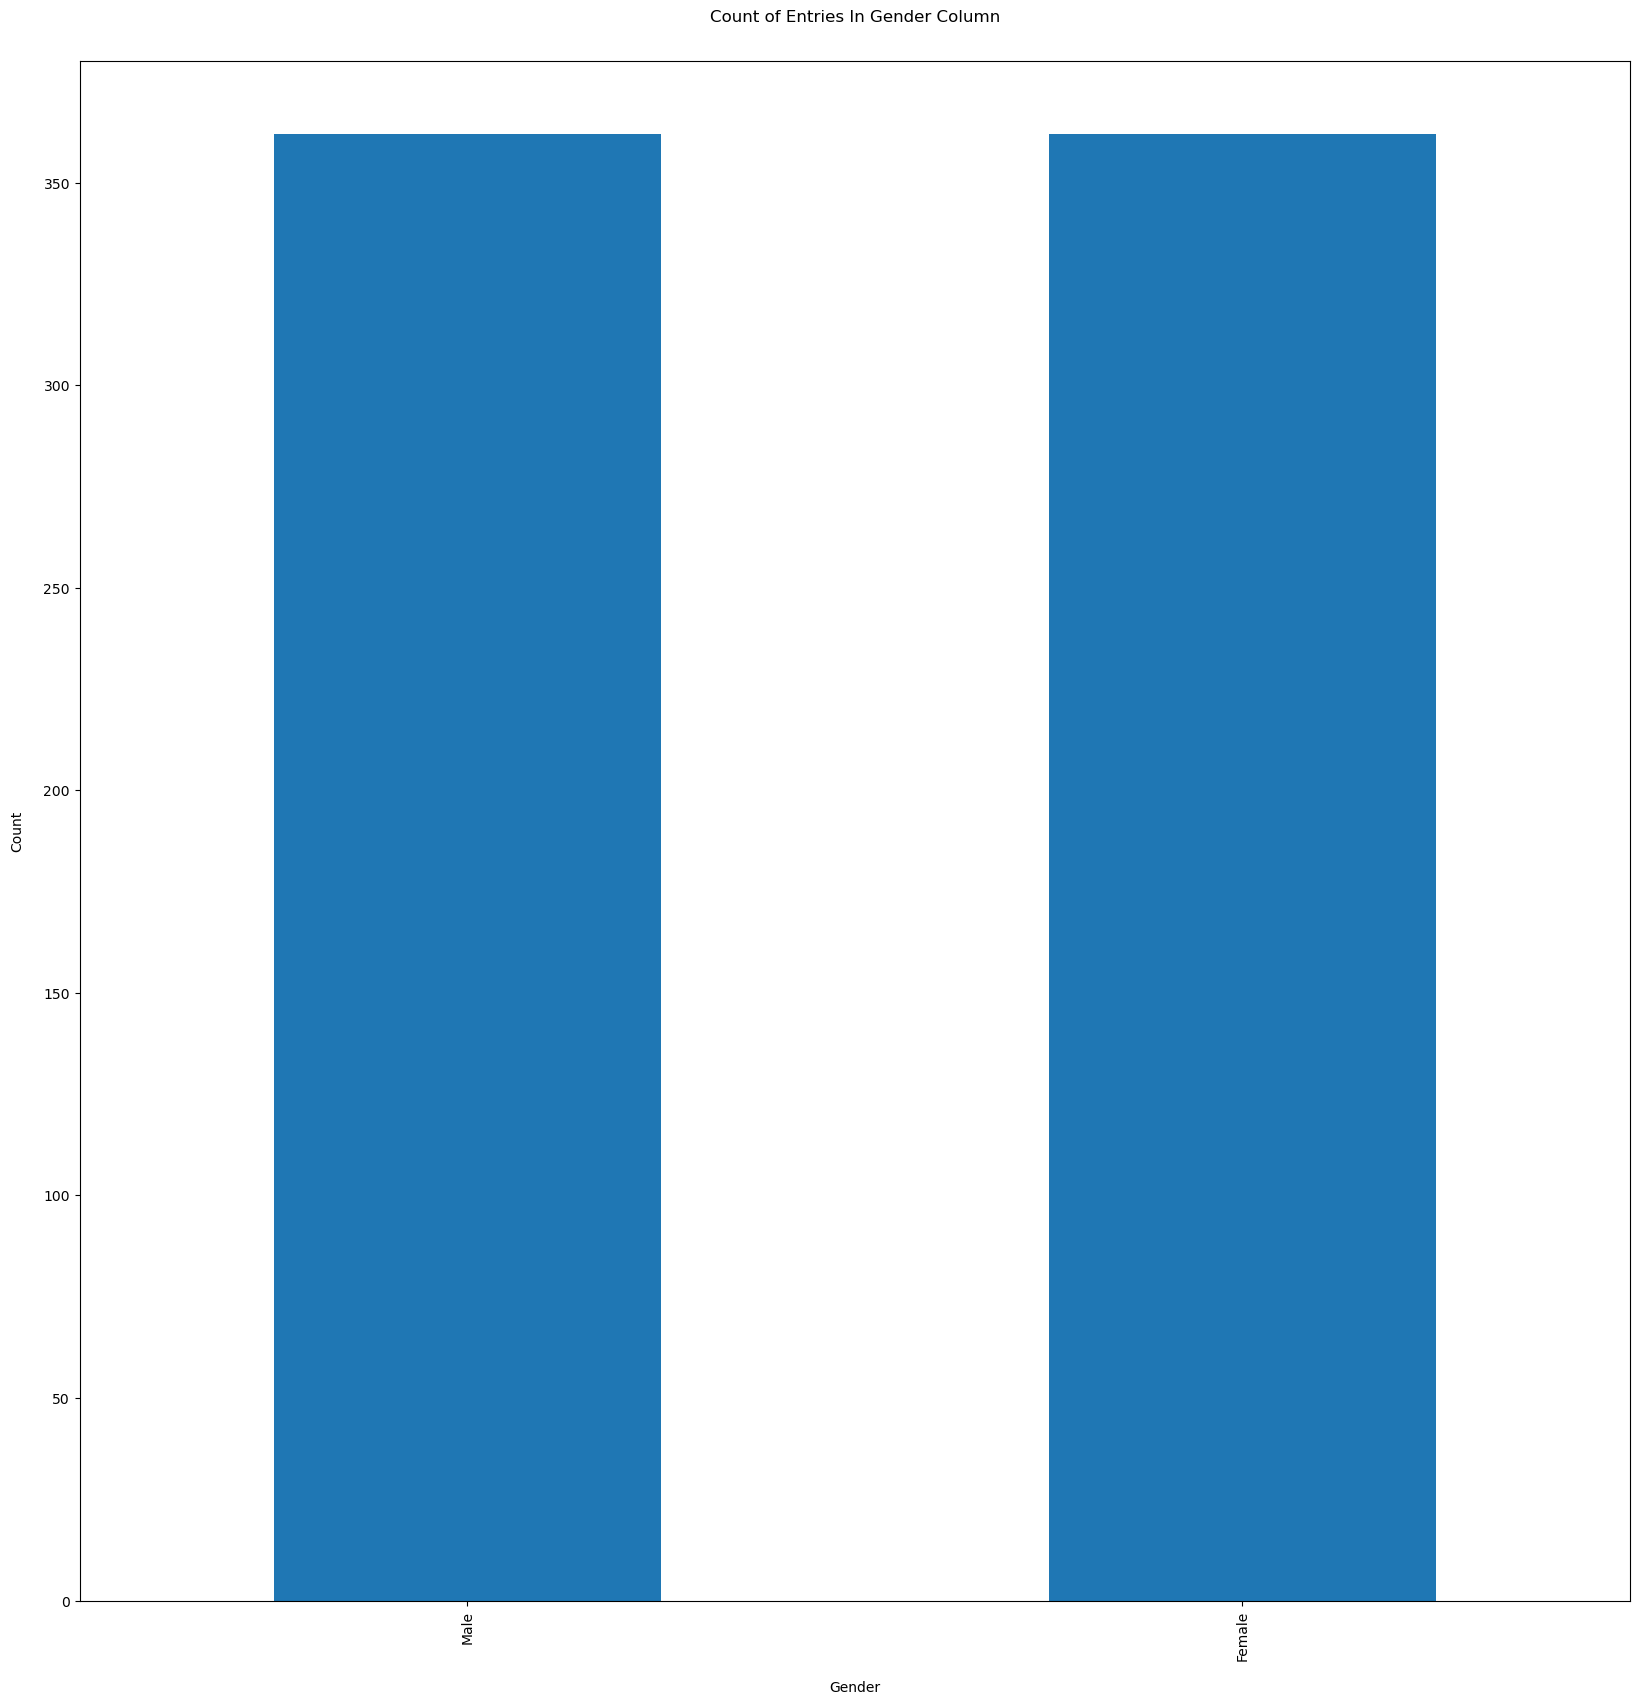

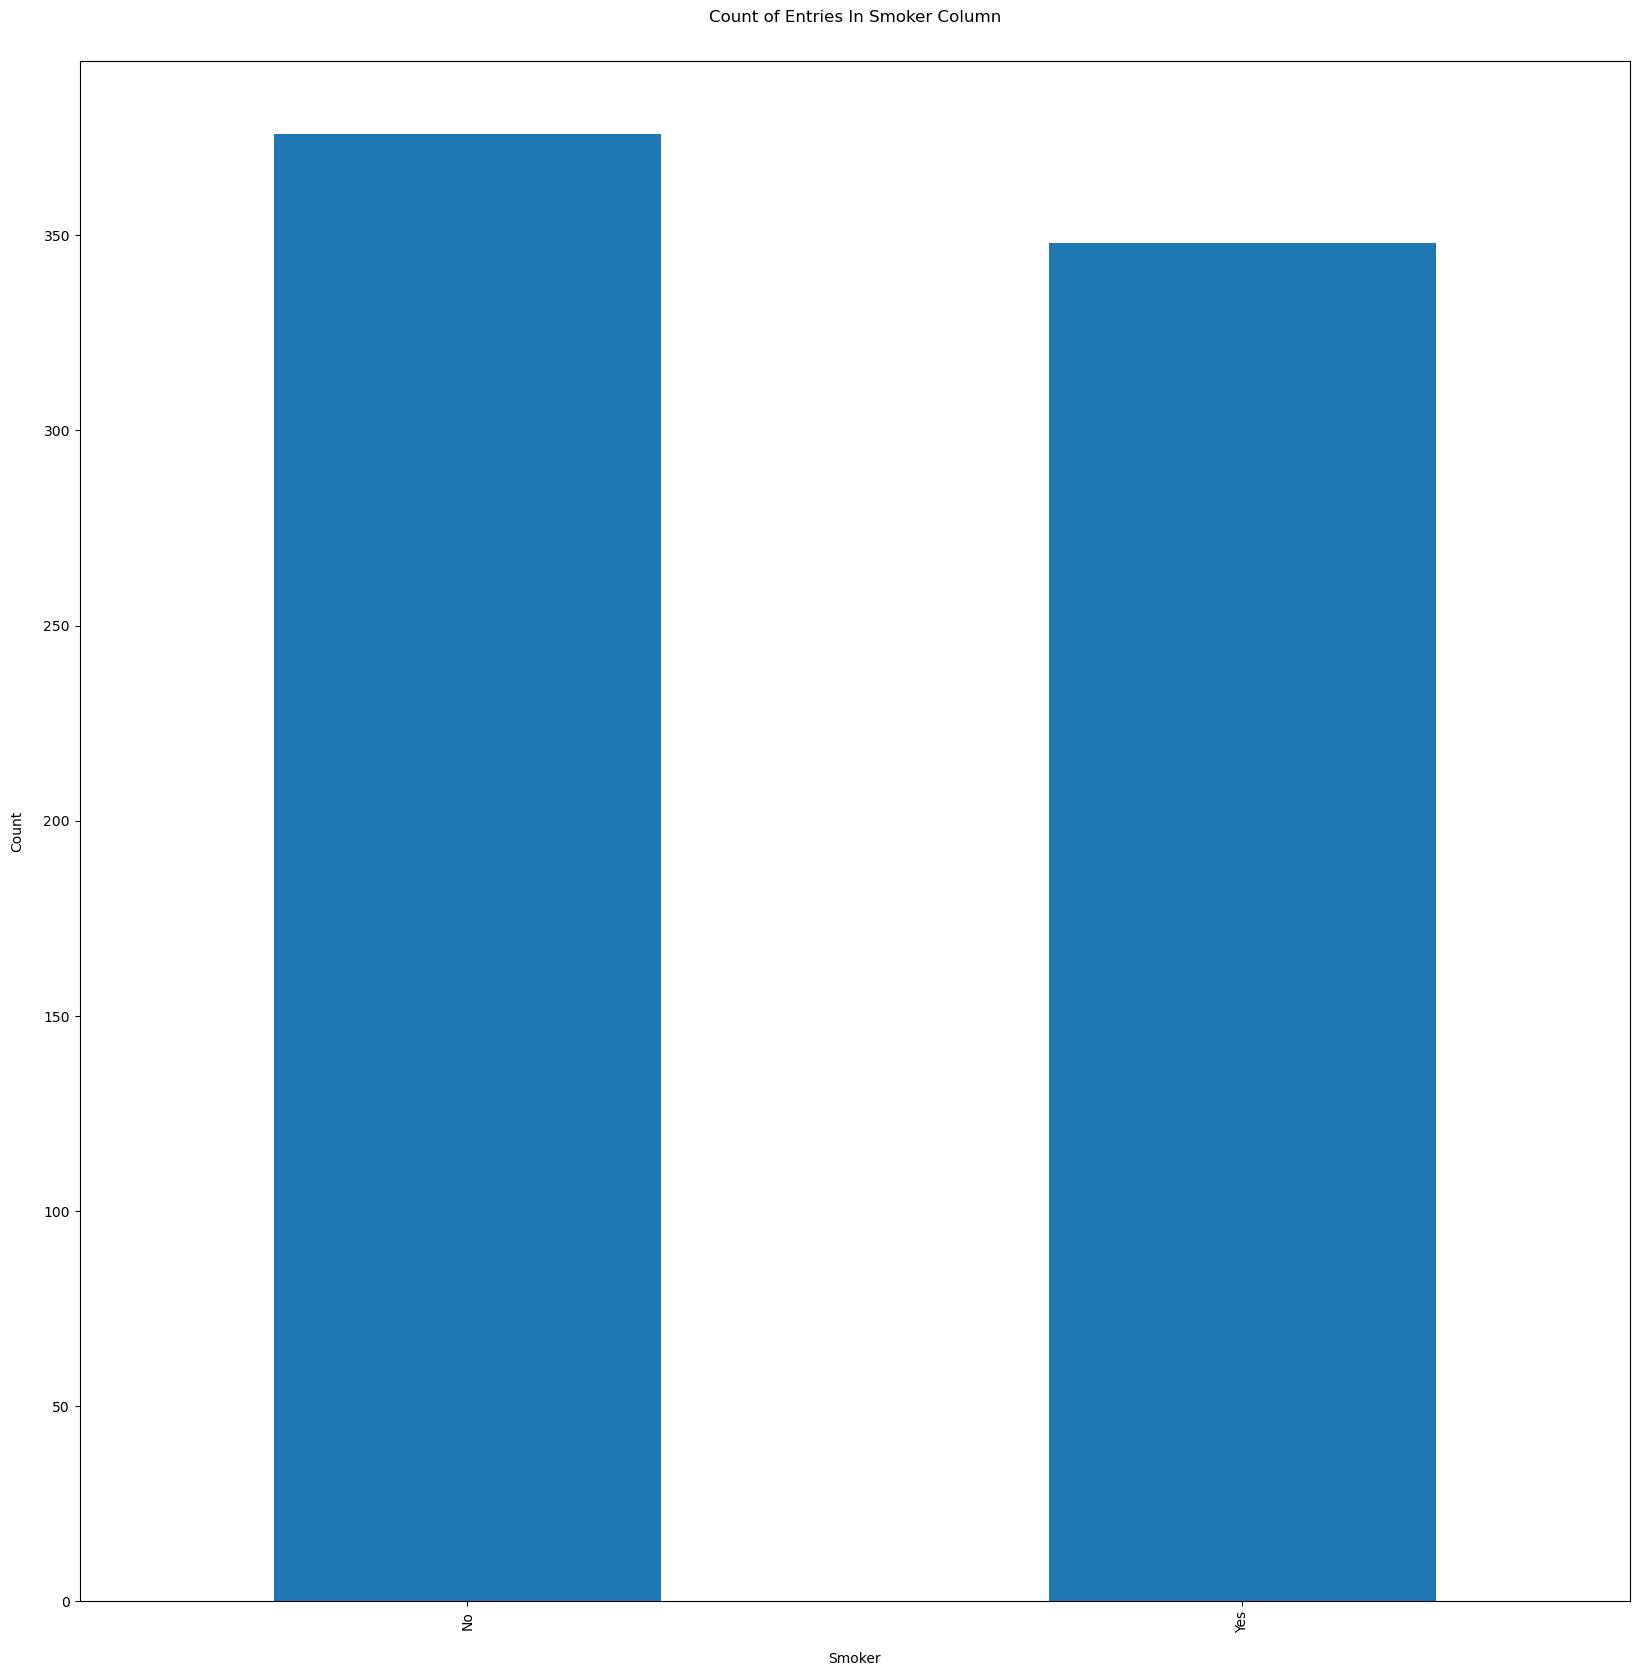

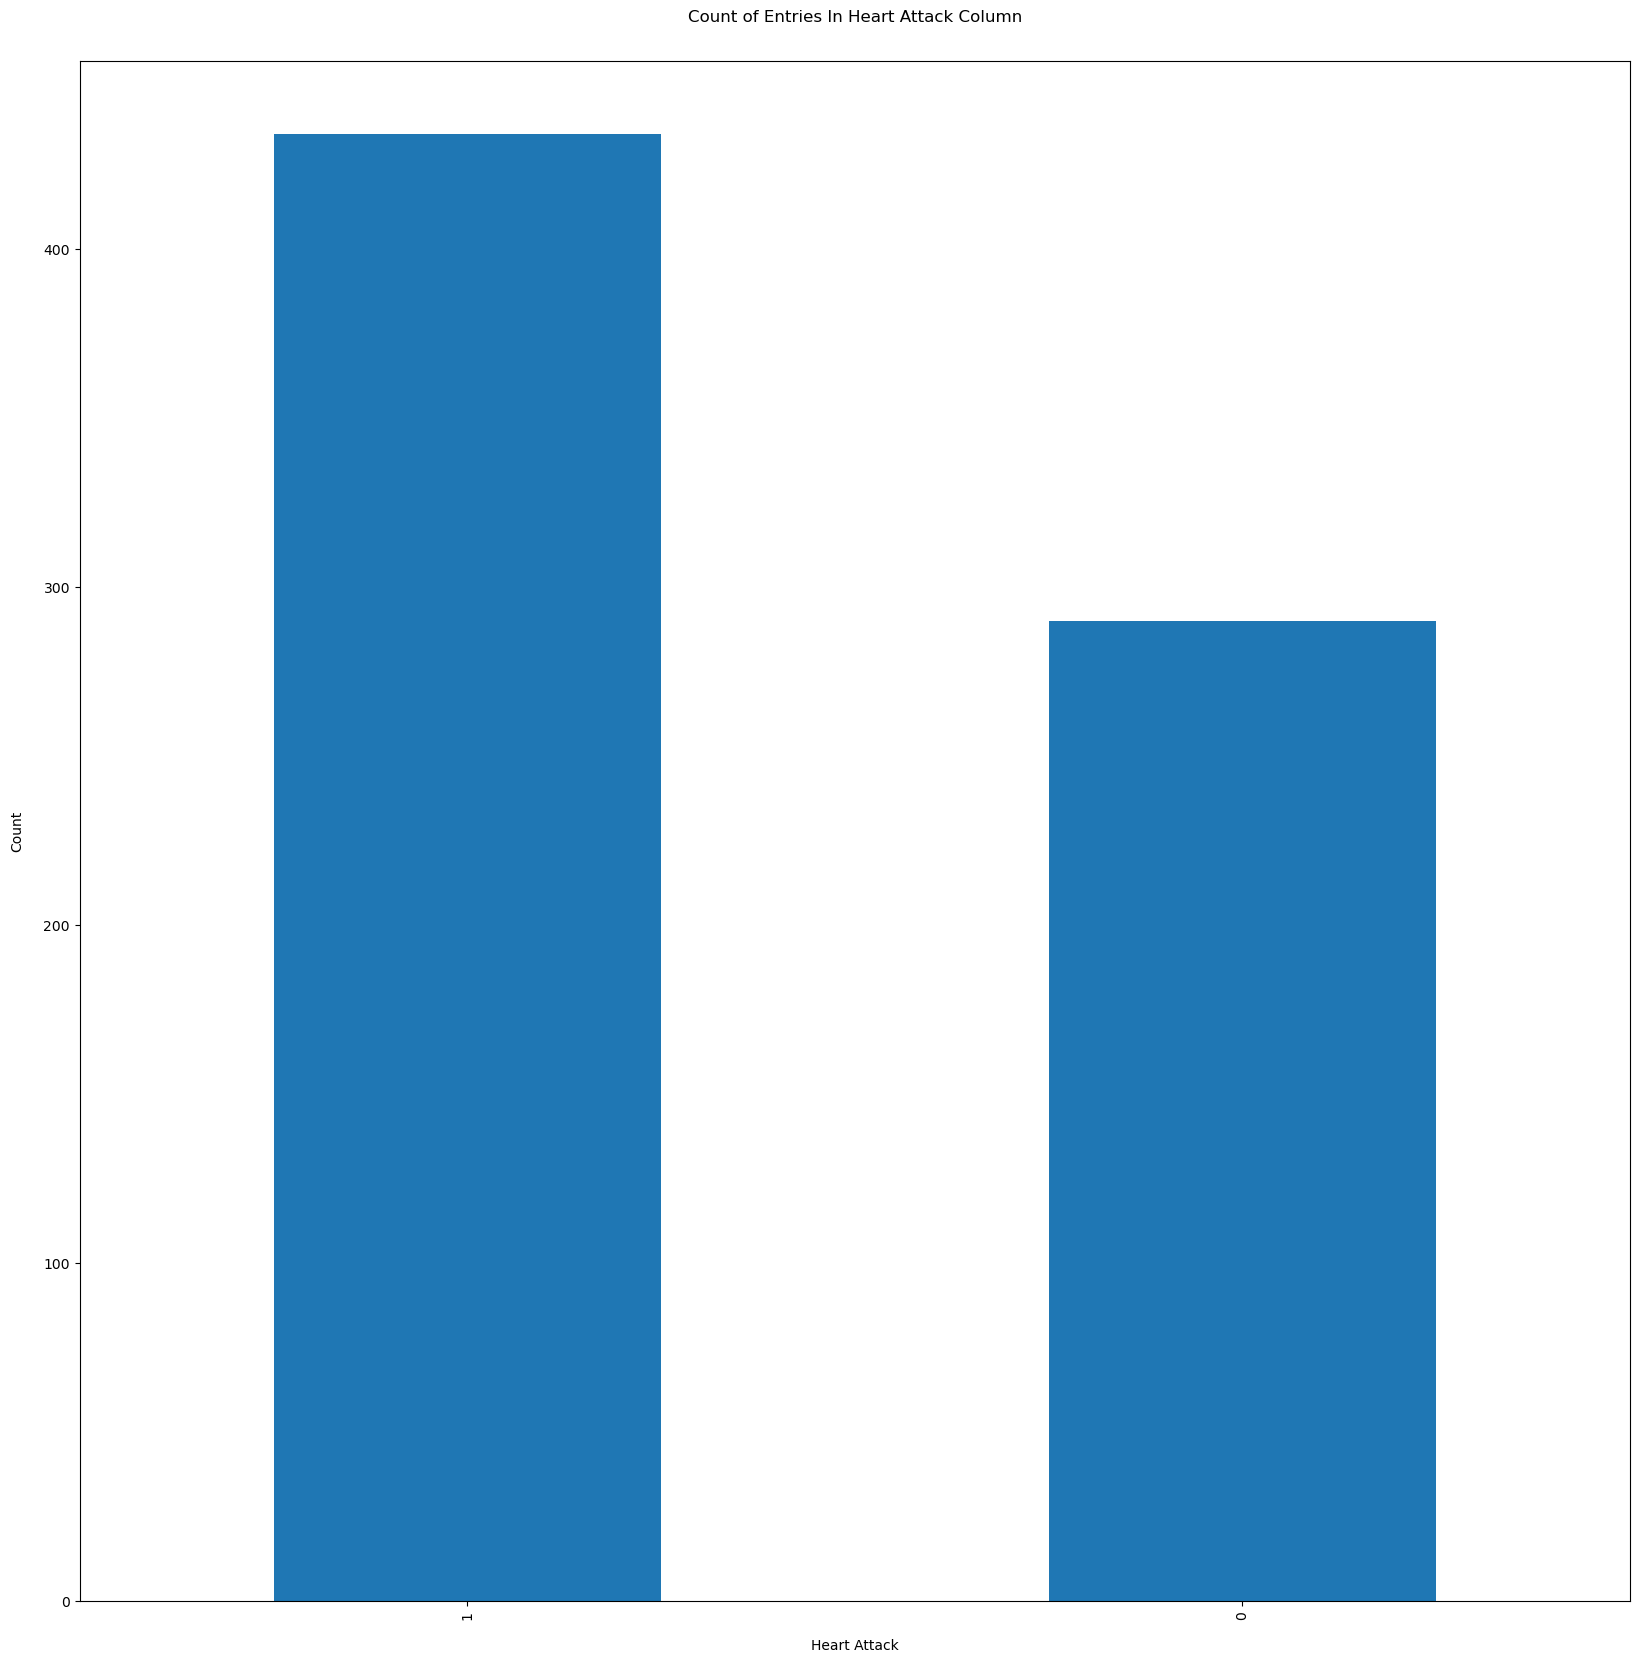

In [137]:
for col in categoricalColumns:
    makeBarCount(imputedDF, col, 20,20)

In [138]:
# Making histograms for all numerical columns
def makeHistogram(myDF, colName, width, height):
    plt.figure(figsize=(width, height))
    plt.hist(myDF[colName])
    plt.xlabel(colName, labelpad=14)
    plt.ylabel("Count", labelpad=14)
    plt.title(f"Distribution of {colName} Column", y=1.02)

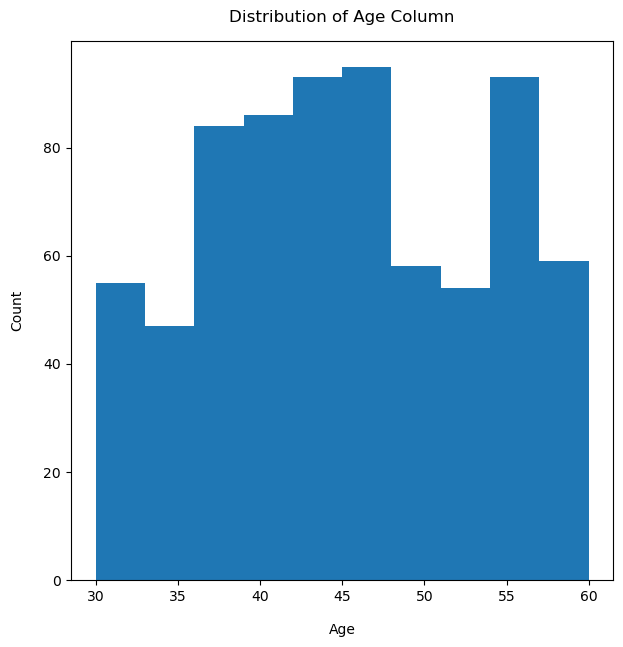

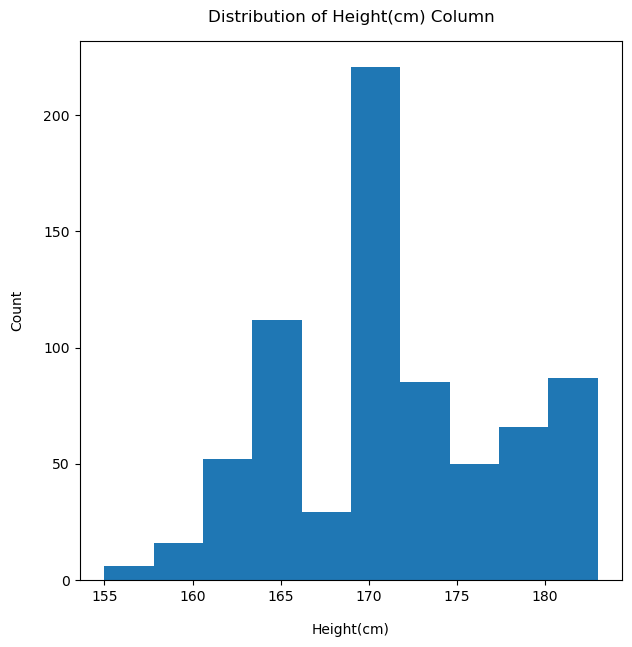

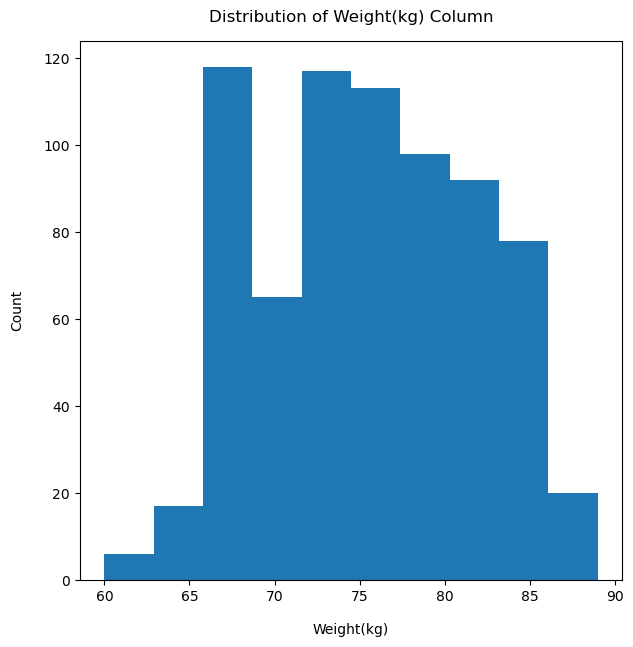

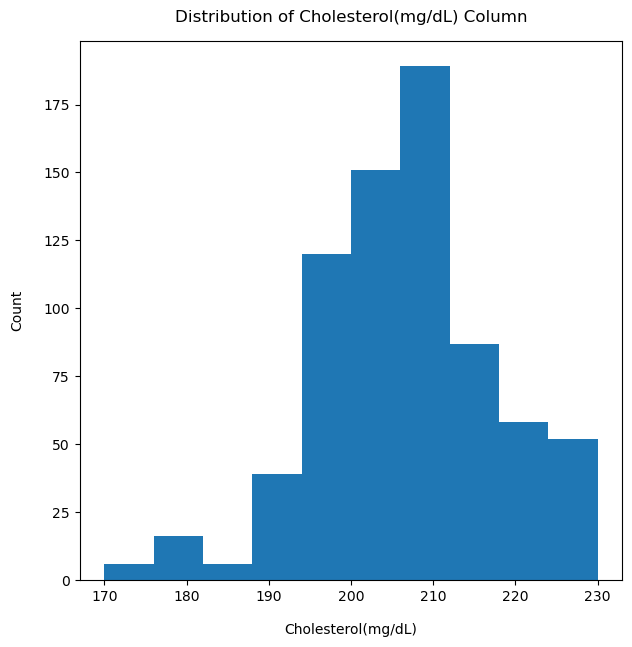

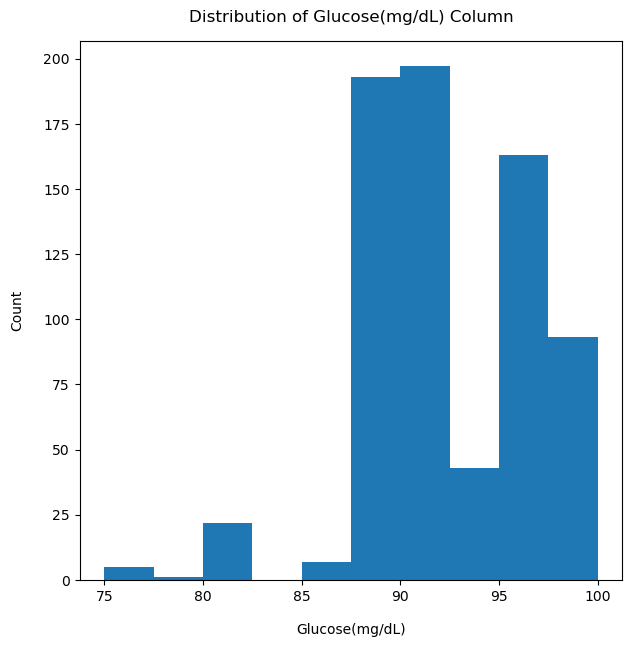

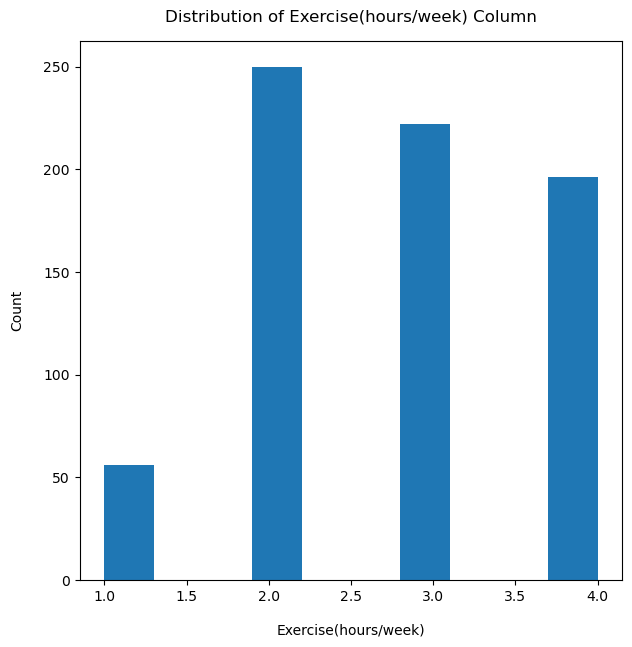

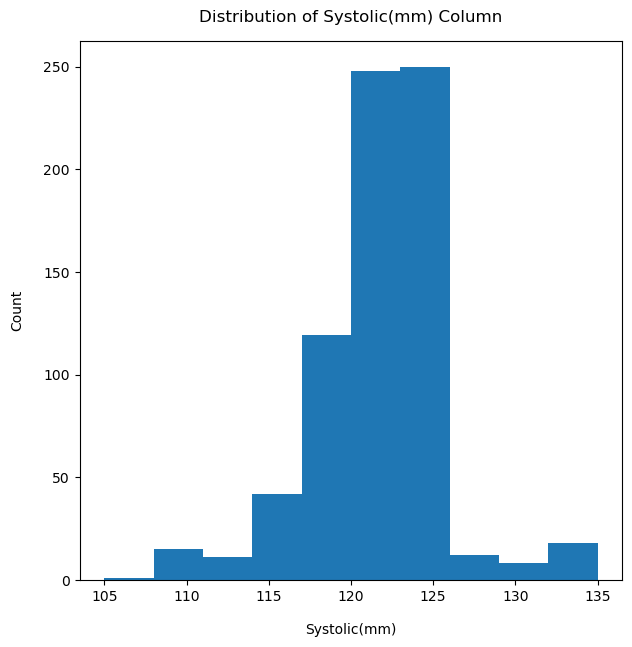

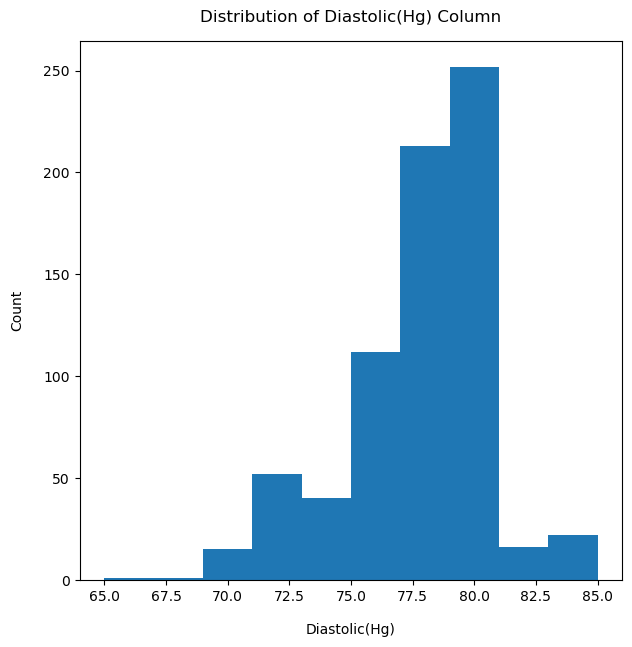

In [139]:
for col in numericalColumns:
    makeHistogram(imputedDF, col, 7, 7)

In [140]:
# Label encoding gender
def getLabelList(n):
    labelList = []
    for i in range(n):
        labelList.append(i)
    return labelList
genderList = ["Male", "Female"]
encodedDF = imputedDF
encodedDF["Gender"] = imputedDF["Gender"].replace(genderList, getLabelList(len(genderList)))
encodedDF.head(10)

,Name,Age,Gender,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack,Systolic(mm),Diastolic(Hg)
0,John Doe,45,0,175,80,200,90,No,3,0,120.0,80.0
1,Jane Smith,35,1,160,65,180,80,No,2,0,110.0,70.0
2,Michael Johnson,55,0,180,85,220,95,Yes,4,1,130.0,85.0
3,Sarah Brown,40,1,165,70,190,85,No,3,0,115.0,75.0
4,David Lee,50,0,170,75,210,92,Yes,2,1,125.0,80.0
5,Emily Davis,30,1,155,60,170,75,No,1,0,105.0,65.0
6,Robert Wilson,60,0,175,82,230,98,No,3,1,135.0,85.0
7,Amanda Martinez,38,1,162,68,195,88,No,2,0,118.0,72.0
8,Christopher Taylor,48,0,178,78,205,94,Yes,4,1,128.0,82.0
9,Laura Garcia,42,1,168,72,200,90,Yes,3,0,120.0,78.0


In [141]:
# Label encoding smoker
smokerList = ["No", "Yes"]
encodedDF["Smoker"] = encodedDF["Smoker"].replace(smokerList, getLabelList(len(smokerList)))
encodedDF.head(10)

,Name,Age,Gender,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack,Systolic(mm),Diastolic(Hg)
0,John Doe,45,0,175,80,200,90,0,3,0,120.0,80.0
1,Jane Smith,35,1,160,65,180,80,0,2,0,110.0,70.0
2,Michael Johnson,55,0,180,85,220,95,1,4,1,130.0,85.0
3,Sarah Brown,40,1,165,70,190,85,0,3,0,115.0,75.0
4,David Lee,50,0,170,75,210,92,1,2,1,125.0,80.0
5,Emily Davis,30,1,155,60,170,75,0,1,0,105.0,65.0
6,Robert Wilson,60,0,175,82,230,98,0,3,1,135.0,85.0
7,Amanda Martinez,38,1,162,68,195,88,0,2,0,118.0,72.0
8,Christopher Taylor,48,0,178,78,205,94,1,4,1,128.0,82.0
9,Laura Garcia,42,1,168,72,200,90,1,3,0,120.0,78.0


In [142]:
# label encoding Heart Attack
heartAttackList = ["0", "1"]
encodedDF["Heart Attack"] = encodedDF["Heart Attack"].replace(heartAttackList, getLabelList(len(heartAttackList)))
encodedDF.head(10)

,Name,Age,Gender,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack,Systolic(mm),Diastolic(Hg)
0,John Doe,45,0,175,80,200,90,0,3,0,120.0,80.0
1,Jane Smith,35,1,160,65,180,80,0,2,0,110.0,70.0
2,Michael Johnson,55,0,180,85,220,95,1,4,1,130.0,85.0
3,Sarah Brown,40,1,165,70,190,85,0,3,0,115.0,75.0
4,David Lee,50,0,170,75,210,92,1,2,1,125.0,80.0
5,Emily Davis,30,1,155,60,170,75,0,1,0,105.0,65.0
6,Robert Wilson,60,0,175,82,230,98,0,3,1,135.0,85.0
7,Amanda Martinez,38,1,162,68,195,88,0,2,0,118.0,72.0
8,Christopher Taylor,48,0,178,78,205,94,1,4,1,128.0,82.0
9,Laura Garcia,42,1,168,72,200,90,1,3,0,120.0,78.0


In [143]:
# One Hot Encoding Names Column
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encodedData = encoder.fit_transform(encodedDF[["Name"]])
encoder.categories_

c:\Users\austi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['Aaron Taylor', 'Amanda Johnson', 'Amanda Martinez',
        'Amanda Thomas', 'Amy Johnson', 'Andrew Lee', 'Ashley Brown',
        'Ashley Martinez', 'Ashley Nguyen', 'Ashley Rodriguez',
        'Ashley White', 'Brandon Smith', 'Brian Smith', 'Christina Smith',
        'Christopher Brown', 'Christopher Garcia', 'Christopher Hernandez',
        'Christopher Johnson', 'Christopher Lee', 'Christopher Nguyen',
        'Christopher Smith', 'Christopher Taylor', 'Daniel Perez',
        'Daniel Rodriguez', 'David Hernandez', 'David Kim', 'David Lee',
        'David Martinez', 'David Nguyen', 'David Rodriguez',
        'David Wilson', 'Elizabeth Hernandez', 'Elizabeth Lee',
        'Elizabeth Martinez', 'Elizabeth Rodriguez', 'Elizabeth Wang',
        'Emily Brown', 'Emily Davis', 'Emily Garcia', 'Emily Kim',
        'Emily Lee', 'Emily Rodriguez', 'Emily Wilson', 'James Davis',
        'James Garcia', 'James Nguyen', 'James Rodriguez', 'Jane Smith',
        'Jason Brown', 'Jason Wilso

In [144]:
oneHotDF = pd.DataFrame(encodedData, columns=encoder.categories_)
oneHotDF.head()

,Aaron Taylor,Amanda Johnson,Amanda Martinez,Amanda Thomas,Amy Johnson,Andrew Lee,Ashley Brown,Ashley Martinez,Ashley Nguyen,Ashley Rodriguez,...,Stephanie Brown,Stephanie Gonzalez,Stephanie Kim,Stephanie Nguyen,Stephanie Thomas,Stephanie Wilson,Susan Taylor,William Anderson,William Lee,William Nguyen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
oneHotDF.columns = oneHotDF.columns.get_level_values(0)
cleanedDF = pd.concat([encodedDF, oneHotDF], axis=1).drop(columns = "Name")
cleanedDF.head()

,Age,Gender,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack,Systolic(mm),...,Stephanie Brown,Stephanie Gonzalez,Stephanie Kim,Stephanie Nguyen,Stephanie Thomas,Stephanie Wilson,Susan Taylor,William Anderson,William Lee,William Nguyen
0,45,0,175,80,200,90,0,3,0,120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35,1,160,65,180,80,0,2,0,110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55,0,180,85,220,95,1,4,1,130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40,1,165,70,190,85,0,3,0,115.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50,0,170,75,210,92,1,2,1,125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


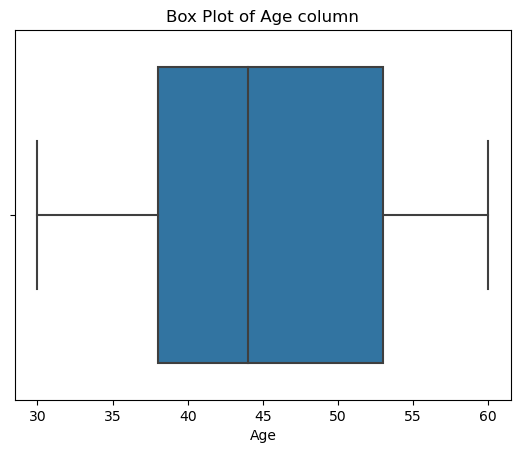

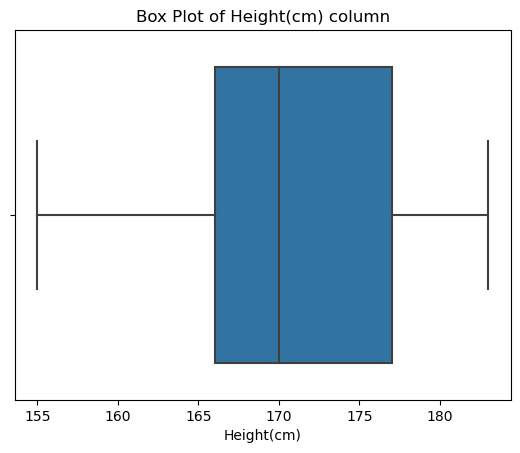

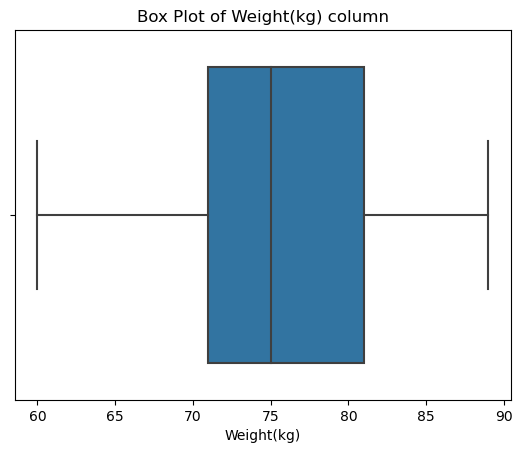

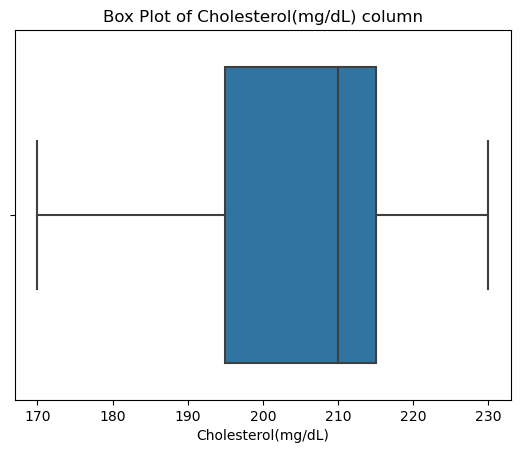

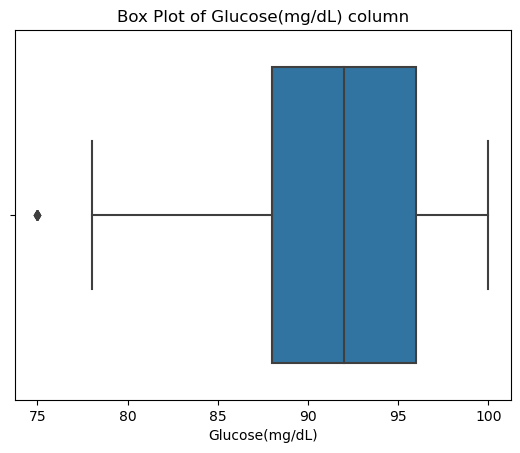

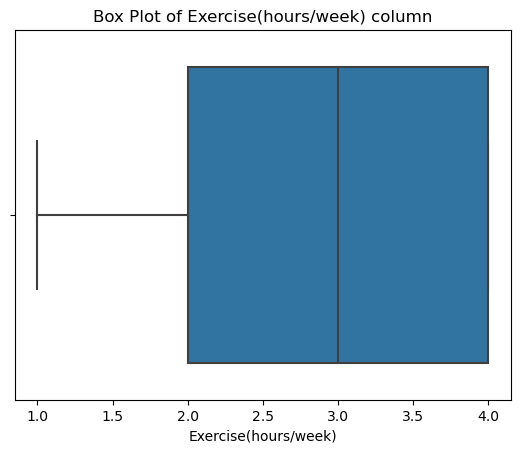

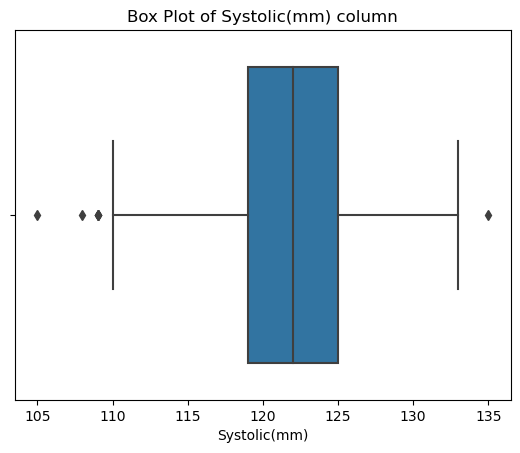

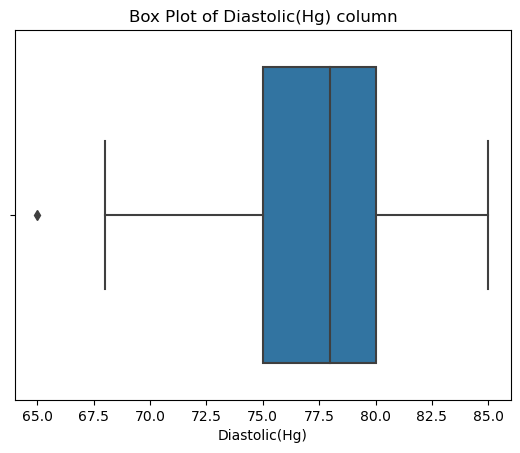

In [146]:
# Box Plot of each Numerical Column
for i in range(len(numericalColumns)):
    col = numericalColumns[i]
    plt.figure(i)
    sns.boxplot(x=cleanedDF[col])
    plt.title(f"Box Plot of {col} column")

In [147]:
# Shape of cleaned dataset before removing outliers 
print(cleanedDF.shape)

(724, 132)


In [148]:
# Removing outliers in Glucose column
import numpy as np
Q1 = np.percentile(cleanedDF['Glucose(mg/dL)'], 25, method='midpoint') 
Q3 = np.percentile(cleanedDF['Glucose(mg/dL)'], 75, method='midpoint') 
IQR = Q3 - Q1
maxThreshold = Q3+1.5*IQR
minThreshold = Q1-1.5*IQR
iqrDF = cleanedDF[cleanedDF["Glucose(mg/dL)"] < maxThreshold]
iqrDF = iqrDF[cleanedDF["Glucose(mg/dL)"] > minThreshold]

Text(0.5, 1.0, 'Box Plot of Glucose(mg/dL)')

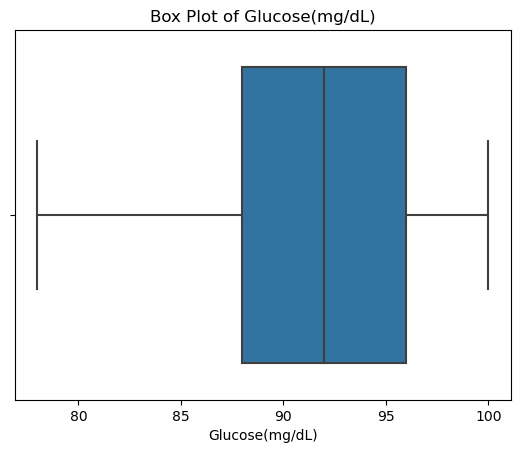

In [149]:
sns.boxplot(x=iqrDF['Glucose(mg/dL)'])
plt.title("Box Plot of Glucose(mg/dL)")

In [150]:
print(iqrDF.shape)

(719, 132)


In [151]:
# Removing Outliers in Systolic Column 
Q1 = np.percentile(iqrDF['Systolic(mm)'], 25, method='midpoint') 
Q3 = np.percentile(iqrDF['Systolic(mm)'], 75, method='midpoint') 
IQR = Q3 - Q1
maxThreshold = Q3+1.5*IQR
minThreshold = Q1-1.5*IQR
iqrDF = iqrDF[iqrDF["Systolic(mm)"] < maxThreshold]
iqrDF = iqrDF[iqrDF["Systolic(mm)"] > minThreshold]

Text(0.5, 1.0, 'Box Plot of Systolic(mm)')

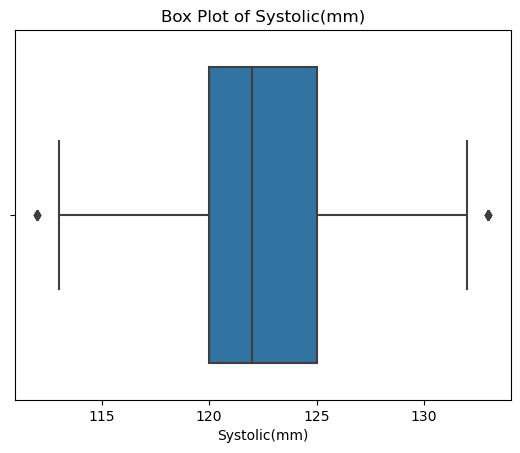

In [152]:
sns.boxplot(x=iqrDF['Systolic(mm)'])
plt.title("Box Plot of Systolic(mm)")

In [153]:
print(iqrDF.shape)

(707, 132)


In [171]:
# Removing Outliers in Diastolic Column 
Q1 = np.percentile(iqrDF['Diastolic(Hg)'], 25, method='midpoint') 
Q3 = np.percentile(iqrDF['Diastolic(Hg)'], 75, method='midpoint') 
IQR = Q3 - Q1
maxThreshold = Q3+1.5*IQR
minThreshold = Q1-1.5*IQR
iqrDF = iqrDF[iqrDF["Diastolic(Hg)"] < maxThreshold]
iqrDF = iqrDF[iqrDF["Diastolic(Hg)"] > minThreshold]

Text(0.5, 1.0, 'Box Plot of Diastolic(Hg)')

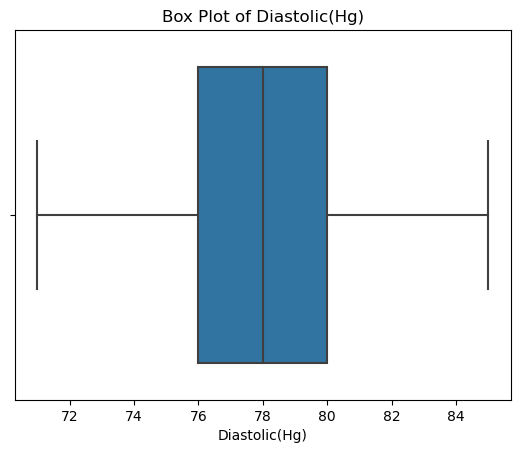

In [155]:
sns.boxplot(x=iqrDF['Diastolic(Hg)'])
plt.title("Box Plot of Diastolic(Hg)")

In [156]:
print(iqrDF.shape)

(706, 132)


In [157]:
iqrDF.head()

,Age,Gender,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack,Systolic(mm),...,Stephanie Brown,Stephanie Gonzalez,Stephanie Kim,Stephanie Nguyen,Stephanie Thomas,Stephanie Wilson,Susan Taylor,William Anderson,William Lee,William Nguyen
0,45,0,175,80,200,90,0,3,0,120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55,0,180,85,220,95,1,4,1,130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40,1,165,70,190,85,0,3,0,115.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50,0,170,75,210,92,1,2,1,125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,38,1,162,68,195,88,0,2,0,118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
# Scaling the features using standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardizedDF = iqrDF

standardizedDF[["Age", "Gender", "Height(cm)", "Weight(kg)", "Cholesterol(mg/dL)", "Glucose(mg/dL)", "Smoker", "Exercise(hours/week)", "Heart Attack", "Systolic(mm)", "Diastolic(Hg)"]] = scaler.fit_transform(iqrDF[["Age", "Gender", "Height(cm)", "Weight(kg)", "Cholesterol(mg/dL)", "Glucose(mg/dL)", "Smoker", "Exercise(hours/week)", "Heart Attack", "Systolic(mm)", "Diastolic(Hg)"]])

standardizedDF.head()

,Age,Gender,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack,Systolic(mm),...,Stephanie Brown,Stephanie Gonzalez,Stephanie Kim,Stephanie Nguyen,Stephanie Thomas,Stephanie Wilson,Susan Taylor,William Anderson,William Lee,William Nguyen
0,-0.013971,-0.977588,0.592433,0.669174,-0.644805,-0.592574,-0.977588,0.210032,-1.259397,-0.546705,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.234563,-0.977588,1.431633,1.487106,1.286190,0.597970,1.022926,1.308419,0.794031,2.280942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.638238,1.022926,-1.085968,-0.966688,-1.610302,-1.783119,-0.977588,0.210032,-1.259397,-1.960529,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.610296,-0.977588,-0.246768,-0.148757,0.320693,-0.116356,1.022926,-0.888356,0.794031,0.867118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.887945,1.022926,-1.589488,-1.293861,-1.127553,-1.068792,-0.977588,-0.888356,-1.259397,-1.112234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
# Separating out the target column, heart attack, from the features 
yDF = pd.DataFrame(standardizedDF["Heart Attack"])
yDF.head()

,Heart Attack
0,-1.259397
2,0.794031
3,-1.259397
4,0.794031
7,-1.259397


In [160]:
xDF = standardizedDF.drop(columns="Heart Attack")
xDF.head()

,Age,Gender,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Systolic(mm),Diastolic(Hg),...,Stephanie Brown,Stephanie Gonzalez,Stephanie Kim,Stephanie Nguyen,Stephanie Thomas,Stephanie Wilson,Susan Taylor,William Anderson,William Lee,William Nguyen
0,-0.013971,-0.977588,0.592433,0.669174,-0.644805,-0.592574,-0.977588,0.210032,-0.546705,0.800866,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.234563,-0.977588,1.431633,1.487106,1.286190,0.597970,1.022926,1.308419,2.280942,2.563369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.638238,1.022926,-1.085968,-0.966688,-1.610302,-1.783119,-0.977588,0.210032,-1.960529,-0.961638,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.610296,-0.977588,-0.246768,-0.148757,0.320693,-0.116356,1.022926,-0.888356,0.867118,0.800866,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.887945,1.022926,-1.589488,-1.293861,-1.127553,-1.068792,-0.977588,-0.888356,-1.112234,-2.019140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
print(xDF.shape)
print(yDF.shape)

(706, 131)
(706, 1)


In [162]:
# splitting the training and testing set
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(xDF, yDF,test_size = 0.3)
xTrain.head()

,Age,Gender,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Systolic(mm),Diastolic(Hg),...,Stephanie Brown,Stephanie Gonzalez,Stephanie Kim,Stephanie Nguyen,Stephanie Thomas,Stephanie Wilson,Susan Taylor,William Anderson,William Lee,William Nguyen
568,0.984856,-0.977588,1.767313,1.650692,1.768939,1.312297,1.022926,-0.888356,0.867118,0.095864,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
393,-1.886772,1.022926,-0.078928,0.178416,0.320693,-0.116356,1.022926,1.308419,0.584354,0.448365,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
469,-0.013971,1.022926,-0.246768,-0.475929,-0.162056,0.359861,-0.977588,0.210032,-0.263940,-0.256636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231,-1.137652,1.022926,-1.589488,-1.293861,-1.127553,-1.068792,-0.977588,-1.986743,-1.112234,-2.019140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,-1.387358,1.022926,-2.093008,-1.948206,-2.575800,-2.497445,-0.977588,-1.986743,-2.808823,-2.019140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


SInce the heart attack column I loaded was already encoded as 0's and 1's I had to do regression models

In [163]:
# Linear Regression 
# Training 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
model = LinearRegression().fit(xTrain, yTrain)
preds = model.predict(xTrain)
print(r2_score(yTrain, preds))
print(mean_absolute_error(yTrain, preds))
print(mean_squared_error(yTrain, preds, squared = False))

0.9939064451249829
0.024011044057140093
0.07855363642924808


In [164]:
# Linear Regression Testing
model = LinearRegression().fit(xTrain, yTrain)
preds = model.predict(xTest)
print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))
print(mean_squared_error(yTest, preds, squared = False))

-1.7620143193891516e+21
8849067575.95172
41213471766.525566


In [165]:
#SVR Train
from sklearn import svm
model = svm.SVR().fit(xTrain, yTrain)
preds = model.predict(xTrain)
print(r2_score(yTrain, preds))
print(mean_absolute_error(yTrain, preds))
print(mean_squared_error(yTrain, preds, squared = False))

0.9918422835750876
0.07239706699010404
0.0908898179059346


c:\Users\austi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [166]:
# SVR Test
model = svm.SVR().fit(xTrain, yTrain)
preds = model.predict(xTest)
print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))
print(mean_squared_error(yTest, preds, squared = False))

0.9777146099017514
0.07919094345945171
0.14656983671657622


c:\Users\austi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [167]:
# Decision Tree Train
from sklearn import tree
model = tree.DecisionTreeRegressor().fit(xTrain, yTrain)
preds = model.predict(xTrain)
print(r2_score(yTrain, preds))
print(mean_absolute_error(yTrain, preds))
print(mean_squared_error(yTrain, preds, squared = False))

1.0
4.488087814122343e-16
4.732209727813927e-16


In [168]:
# Decision Tree Test
model = tree.DecisionTreeRegressor().fit(xTrain, yTrain)
preds = model.predict(xTest)
print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))
print(mean_squared_error(yTest, preds, squared = False))

0.979367396593674
0.009685980010331666
0.14102999772116667


In [169]:
# Neural Network Train
from sklearn.neural_network import MLPRegressor
model = MLPRegressor().fit(xTrain, yTrain)
preds = model.predict(xTrain)
print(r2_score(yTrain, preds))
print(mean_absolute_error(yTrain, preds))
print(mean_squared_error(yTrain, preds, squared = False))

c:\Users\austi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9980167818594322
0.018364816411860777
0.044814254298540634


In [170]:
# Neural Network Test 
model = MLPRegressor().fit(xTrain, yTrain)
preds = model.predict(xTest)
print(r2_score(yTest, preds))
print(mean_absolute_error(yTest, preds))
print(mean_squared_error(yTest, preds, squared = False))

c:\Users\austi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9689662109816596
0.05829109388303277
0.17296247267582637
